## <center> Ejercicio 1 </center>
Marty Ford es analista de operaciones de Piedmont Commuter Airlines (PCA). Recientemente, le pidieron a Marty que hiciera una recomendación sobre cuántas reservas debería hacer PCA para el vuelo 343, un vuelo desde un pequeño aeropuerto regional en Nueva Inglaterra a un importante centro de operaciones en el aeropuerto Logan de Boston. El avión utilizado en el vuelo 343 es un pequeño turbohélice bimotor con 19 asientos disponibles para pasajeros. PCA vende boletos no reembolsables para el vuelo 343 a $150 por asiento.

Las estadísticas del sector muestran que por cada tiquete vendido para un vuelo interurbano, existe una probabilidad de 0.10 de que el titular del tiquete no esté en el vuelo. Por tanto, si PCA vende 19 billetes para este vuelo, hay una probabilidad bastante buena de que uno o más asientos del avión estén vacíos. Por supuesto, los asientos vacíos representan una pérdida de ingresos potenciales para la empresa. Por otro lado, si PCA realiza una sobreventa de billetes para este vuelo y se presentan más de 19 pasajeros, algunos de ellos tendrán que ser trasladados a un vuelo posterior.

Para compensar la incomodidad de ser rechazados, PCA les da a estos pasajeros vales para una comida gratis, un vuelo gratis en una fecha posterior y, a veces, también les paga para que pasen la noche en un hotel cerca del aeropuerto. PCA paga un promedio de $325 (incluido el costo de la pérdida de prestigio) por cada pasajero que se queda sin pasaje. Marty quiere determinar si PCA puede aumentar las ganancias mediante la sobreventa de este vuelo y, de ser así, cuántas reservas se deben aceptar para producir el máximo beneficio promedio. Para ayudar en el análisis, Marty analizó los datos de investigación de mercado para este vuelo que revelan la siguiente distribución de probabilidad de la demanda para este vuelo:

| Demanda | 14  | 15  | 16  | 17  | 18  | 19  | 20  | 21  | 22  | 23  | 24  | 25  |
|:--------------:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Probabilidad   | 0.03 | 0.05 | 0.07 | 0.09 | 0.11 | 0.15 | 0.18 | 0.14 | 0.08 | 0.05 | 0.03 | 0.02 |


### 1. Librerias necesarias

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import rv_discrete, rv_histogram, binom
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF

### 2. Entradas conocidas

In [16]:
precio_boleto = 150
costo_sobrante = 325
num_asientos = 19
prob_no_show = 0.10
num_simulaciones = 10000

demanda = np.arange(14, 26) # Posibles valores de demanda
probabilidad_demanda = [0.03, 0.05, 0.07, 0.09, 0.11, 0.15, 0.18, 0.14, 0.08, 0.05, 0.03, 0.02]

### 3. Variables de decisión

In [17]:
boletos_vendidos = np.arange(19, 26)

### 4. Entradas inciertas

In [13]:
demanda_sillas= rv_discrete(name='Demanda',values=(demanda, probabilidad_demanda))

### 5. Cálculos intermedios

In [19]:
resultados = []
for reservas in boletos_vendidos:
  beneficio = []
  for _ in range(num_simulaciones):
    demanda_real = demanda_sillas.rvs()

    sillas_vendidas=min(reservas, demanda_real)
    pasajeros_presentes = binom.rvs(n=sillas_vendidas, p=1-prob_no_show)

    ingreso_sillas = (sillas_vendidas * precio_boleto)
    costo_rechazo = max(0, (pasajeros_presentes - 19) * costo_sobrante)
    beneficio_total = ingreso_sillas - costo_rechazo

    beneficio.append(beneficio_total)
  #resumen
  resultados.append({
      "reservas aceptadas" : reservas,
      "minimo" : min(beneficio),
      "percentil 20" : np.percentile(beneficio, 20),
      "media" : np.mean(beneficio),
      "percentil 80" : np.percentile(beneficio, 80),
      "maximo" : np.max(beneficio)

  })



### 6. Salidas

In [20]:
df_resultados=pd.DataFrame(resultados)
df_resultados

,reservas aceptadas,minimo,percentil 20,media,percentil 80,maximo
0,19,2100,2550.0,2722.3950,2850.0,2850
1,20,2100,2550.0,2776.7075,3000.0,3000
2,21,2100,2550.0,2782.9950,3000.0,3150
3,22,2100,2550.0,2781.9475,3000.0,3300
4,23,2100,2500.0,2773.2075,3000.0,3450
5,24,1975,2500.0,2768.4725,3000.0,3600
6,25,1800,2500.0,2766.0450,3000.0,3750


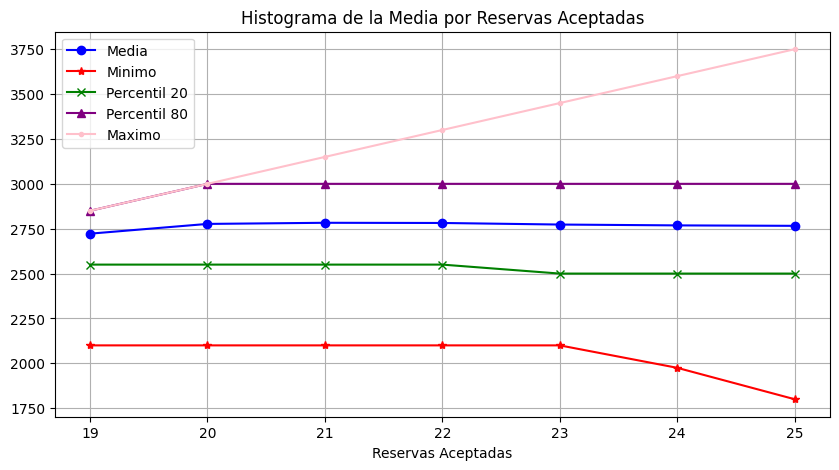

In [26]:
# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(df_resultados['reservas aceptadas'], df_resultados['media'], marker='o', color='blue')
plt.plot(df_resultados['reservas aceptadas'], df_resultados['minimo'], marker='*', color='red')
plt.plot(df_resultados['reservas aceptadas'], df_resultados['percentil 20'], marker='x', color='green')
plt.plot(df_resultados['reservas aceptadas'], df_resultados['percentil 80'], marker='^', color='purple')
plt.plot(df_resultados['reservas aceptadas'], df_resultados['maximo'], marker='.', color='pink')

plt.title("Histograma de la Media por Reservas Aceptadas")
plt.xlabel('Reservas Aceptadas')
plt.legend(['Media', 'Minimo', 'Percentil 20', 'Percentil 80', 'Maximo'])
plt.grid(True)
plt.show()